In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/kiq/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
from IPython import display

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

In [6]:
spark = SparkSession\
    .builder\
        .master('local')\
            .appName('WordCloud')\
                .getOrCreate()

23/02/12 05:10:59 WARN Utils: Your hostname, base resolves to a loopback address: 127.0.1.1; using 192.168.0.120 instead (on interface wlo1)
23/02/12 05:10:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/02/12 05:11:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [9]:
def cleaning(data):
    words = data\
        .select(f.explode(f.split(f.lower('_c0'),' ')).alias('word'))\
        .withColumn('word',f.regexp_replace('word',r'http\S+',''))\
        .withColumn('word',f.regexp_replace('word',r'@\w',''))\
        .withColumn('word',f.regexp_replace('word','rt',''))\
        .withColumn('word',f.regexp_replace('word','http\S+',''))\
        .na.replace('',None)\
        .na.drop()
    return words

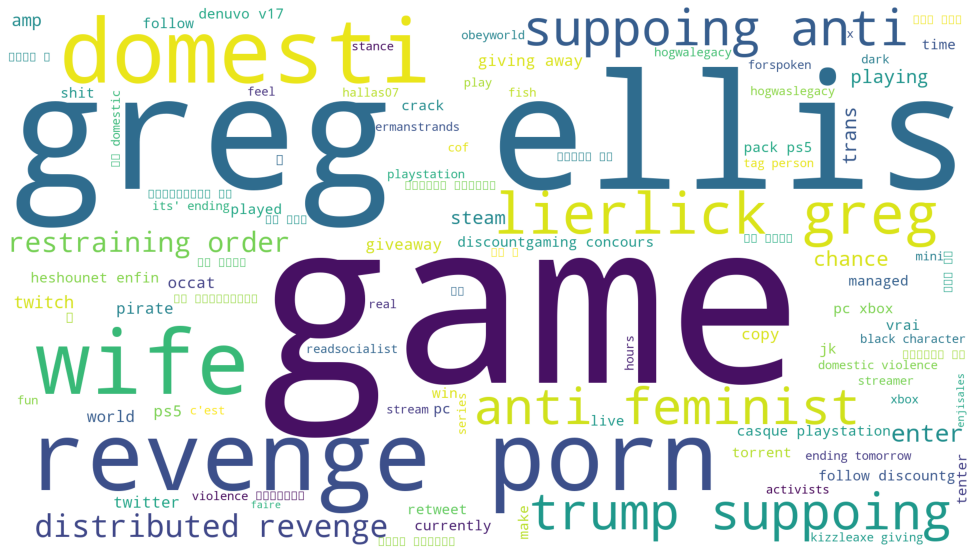

In [16]:
stops = stopwords.words()
stops.append('hogwarts')
stops.append('hogwas')
stops.append('legacy')
plt.figure(figsize=(20,10))

while True:
    try:
        data = spark.read.csv('./db/*.csv')
        data = cleaning(data)
        rows = data.collect()
        all_words = ''
        for row in rows:
            all_words = all_words + ' ' +row['word']
        
        wc = WordCloud(stopwords=stops,background_color='white',width=1920,height=1080,max_words=100).generate(all_words)
        plt.cla()
        plt.axis('off')
        plt.imshow(wc)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(5)
    except KeyboardInterrupt:
        break